In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


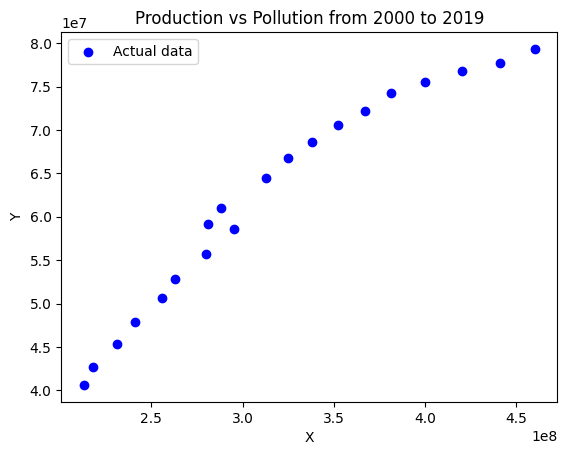

In [55]:
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-pollution.csv', delimiter=',', skip_header=1)
pollution_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-fate.csv', delimiter=',', skip_header=1)
pollution_y = ydata[:, 1]


plt.scatter(pollution_x, pollution_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Pollution from 2000 to 2019')
plt.legend()
plt.show()

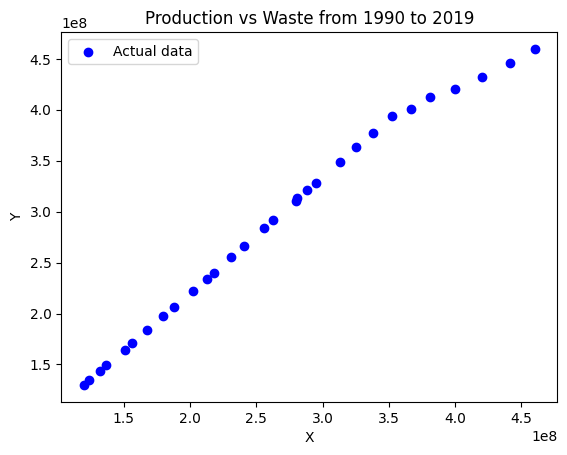

In [56]:
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-waste.csv', delimiter=',', skip_header=1)
waste_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-waste-by-sector.csv', delimiter=',', skip_header=1)
waste_y = ydata[:, 1]


plt.scatter(waste_x, waste_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Waste from 1990 to 2019')
plt.legend()
plt.show()

DEGREE: 1 COEFFICIENTS: [1.61190008e-01 1.07610688e+07] 
 RSS: 173433507040329.53 
 AIC: 601.8216624716024
DEGREE: 2 COEFFICIENTS: [-5.51614738e-10  5.27173304e-01 -4.69173289e+07] 
 RSS: 17500665500582.035 
 AIC: 557.9505550237129
DEGREE: 3 COEFFICIENTS: [-3.72902275e-19 -1.79384138e-10  4.07169187e-01 -3.44391992e+07] 
 RSS: 17188502428917.918 
 AIC: 559.5905907847532
DEGREE: 4 COEFFICIENTS: [ 1.74537092e-26 -2.36935006e-17  1.12486609e-08 -2.02429081e+00
  1.54937294e+08] 
 RSS: 14662843388973.533 
 AIC: 558.4121095123551
DEGREE: 5 COEFFICIENTS: [ 1.25136982e-35 -3.53637253e-27 -9.84084853e-18  6.75566136e-09
 -1.30853273e+00  1.10152984e+08] 
 RSS: 14657608191772.209 
 AIC: 560.4049674705724



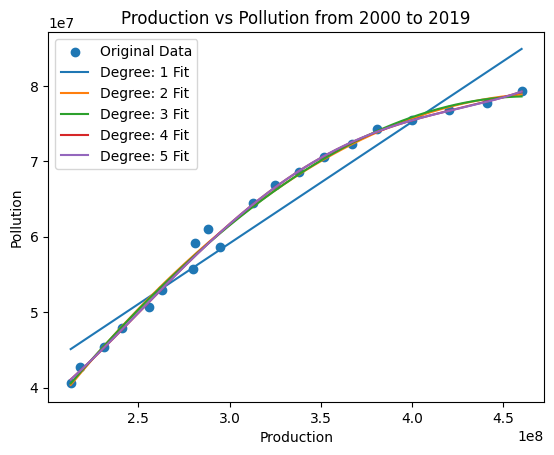

[-5.51614738e-10  5.27173304e-01 -4.69173289e+07]
Prediction: 61589335.830526546

DEGREE: 1 COEFFICIENTS: [1.02665728e+00 1.56393233e+07] 
 RSS: 3229366945361709.0 
 AIC: 975.2959541737814
DEGREE: 2 COEFFICIENTS: [-9.66922843e-10  1.56510791e+00 -4.98100327e+07] 
 RSS: 749967249216751.9 
 AIC: 933.4955981639687
DEGREE: 3 COEFFICIENTS: [-5.34536046e-18  3.59214491e-09  3.71165801e-01  4.43447676e+07] 
 RSS: 177792342260108.2 
 AIC: 892.313199610464
DEGREE: 4 COEFFICIENTS: [ 4.09978451e-27 -1.00413412e-17  5.49977360e-09  4.83217398e-02
  6.33735253e+07] 
 RSS: 175193729499544.25 
 AIC: 893.8714836480142
DEGREE: 5 COEFFICIENTS: [ 3.11597169e-34 -4.43446074e-25  2.36355251e-16 -5.91584502e-08
  8.09449714e+00 -3.14929503e+08] 
 RSS: 68177658590676.01 
 AIC: 867.5582197640181



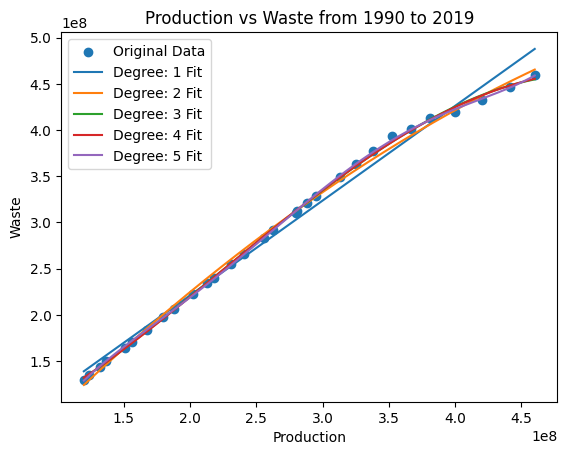

[ 3.11597169e-34 -4.43446074e-25  2.36355251e-16 -5.91584502e-08
  8.09449714e+00 -3.14929503e+08]
Prediction: 336018829.0792953



In [60]:
def linear_fit2(x, y):
    xT = np.transpose(x)
    xTx = np.dot(xT, x)
    xTy = np.dot(xT, y)
    xTx_inv = np.linalg.inv(xTx)
    c = np.dot(xTx_inv, xTy)
    return c

def poly_fit(x, y, num_degrees):
    results = []

    for i in range(1, num_degrees+1):
        xdata = np.linspace(min(x), max(x), 500)
        new_x = np.vander(x, i+1)
        coefficients = linear_fit2(new_x, y)
        final_y = np.polyval(coefficients, xdata)

        #calculate RSS
        sqr_error = np.power((y - np.polyval(coefficients, x)), 2)
        RSS = np.sum(sqr_error)

        #calcualte AIC
        AIC = len(x)*np.log(RSS/len(x))+2*(len(coefficients)+1)

        results.append((i, coefficients, RSS, AIC, xdata, final_y))

    return results

plt.scatter(pollution_x, pollution_y, label="Original Data")
degrees = 5
results = poly_fit(pollution_x, pollution_y, degrees) #calculating polynomials starting at 1 degree to 5 degrees
pollution_stored_coefficients = []
for i in range(0, degrees):
    i, coefficients, RSS, AIC, xdata, final_y = results[i]
    pollution_stored_coefficients.append(coefficients)
    print(f"DEGREE: {i} COEFFICIENTS: {coefficients} \n RSS: {RSS} \n AIC: {AIC}")
    plt.plot(xdata, final_y, label = f"Degree: {i} Fit") 

print("")
plt.title(f"Production vs Pollution from 2000 to 2019")
plt.xlabel("Production")
plt.ylabel("Pollution")
plt.legend() 
plt.show()

pollution_model_number = int(input("Which degree number best represents your data?"))
print(pollution_stored_coefficients[pollution_model_number-1])
pollution_prediction_result = np.polyval(pollution_stored_coefficients[pollution_model_number-1], int(input("Input the production amount in Tonnes")))
print(f"Prediction: {pollution_prediction_result}\n")


plt.scatter(waste_x, waste_y, label="Original Data")
degrees = 5
results = poly_fit(waste_x, waste_y, degrees) #calculating polynomials starting at 1 degree to 5 degrees
waste_stored_coefficients = []
for i in range(0, degrees):
    i, coefficients, RSS, AIC, xdata, final_y = results[i]
    waste_stored_coefficients.append(coefficients)
    print(f"DEGREE: {i} COEFFICIENTS: {coefficients} \n RSS: {RSS} \n AIC: {AIC}")
    plt.plot(xdata, final_y, label = f"Degree: {i} Fit") 

print("")
plt.title(f"Production vs Waste from 1990 to 2019")
plt.xlabel("Production")
plt.ylabel("Waste")
plt.legend() 
plt.show()

waste_model_number = int(input("Which degree number best represents your data?"))
print(waste_stored_coefficients[waste_model_number-1])
waste_prediction_result = np.polyval(waste_stored_coefficients[waste_model_number-1], int(input("Input the production amount in Tonnes")))
print(f"Prediction: {waste_prediction_result}\n")

In [58]:
# X_train, X_test, y_train, y_test = train_test_split(waste_x.reshape(-1, 1), waste_y, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')
# plt.scatter(X_test, y_test, color='blue', label='Actual data')
# plt.scatter(X_test, y_pred, color='red', label='Predicted data')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Production vs Pollution from 2000 to 2019')
# plt.legend()
# plt.show()